#**Aviso antes de iniciar**
Es importante que si se va a correr el programa de corrido (sin darle click a cada pestaña) consideres que la primera parte del codigo es limpieza de datos y a lo largo del código estas tablas se van modificando para un mejor uso. Por eso te recomendamos correr **casilla por casilla**.


El **objetivo** de nuestro proyecto es comparar un método manual de limpieza y ordenamiento de datos respecto al uso de una librería y una API (bendito internet) que, en conjunto, lo hacen en menos pasos. Nos hemos inspirado en nuestro proyecto R que, habla sobre la creación de portafolios de inversión, más adelante podrás verlo.

#¡Bienvenido, y ponte cómodo!

**Ocuparemos las siguientes librerías:**

In [ ]:
import pandas_datareader as pdr # Para obtener las bases de datos de internet 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Esta librería es necesaria para el trabajo técnico (A.K.A talacha)
from matplotlib.ticker import  FuncFormatter # Claro que también aprendimos a obtener funciones individuales de librerías ;)

#Primera parte, arrancamos! 

Vamos a trabajar con datos de acciones del DowJones para conocer cómo podemos observar mediante algunos gráficos el comportamiento de su rendimiento y su riesgo, además de obtener algunas conclusiones. 

**Empresas Listadas en el DowJones**

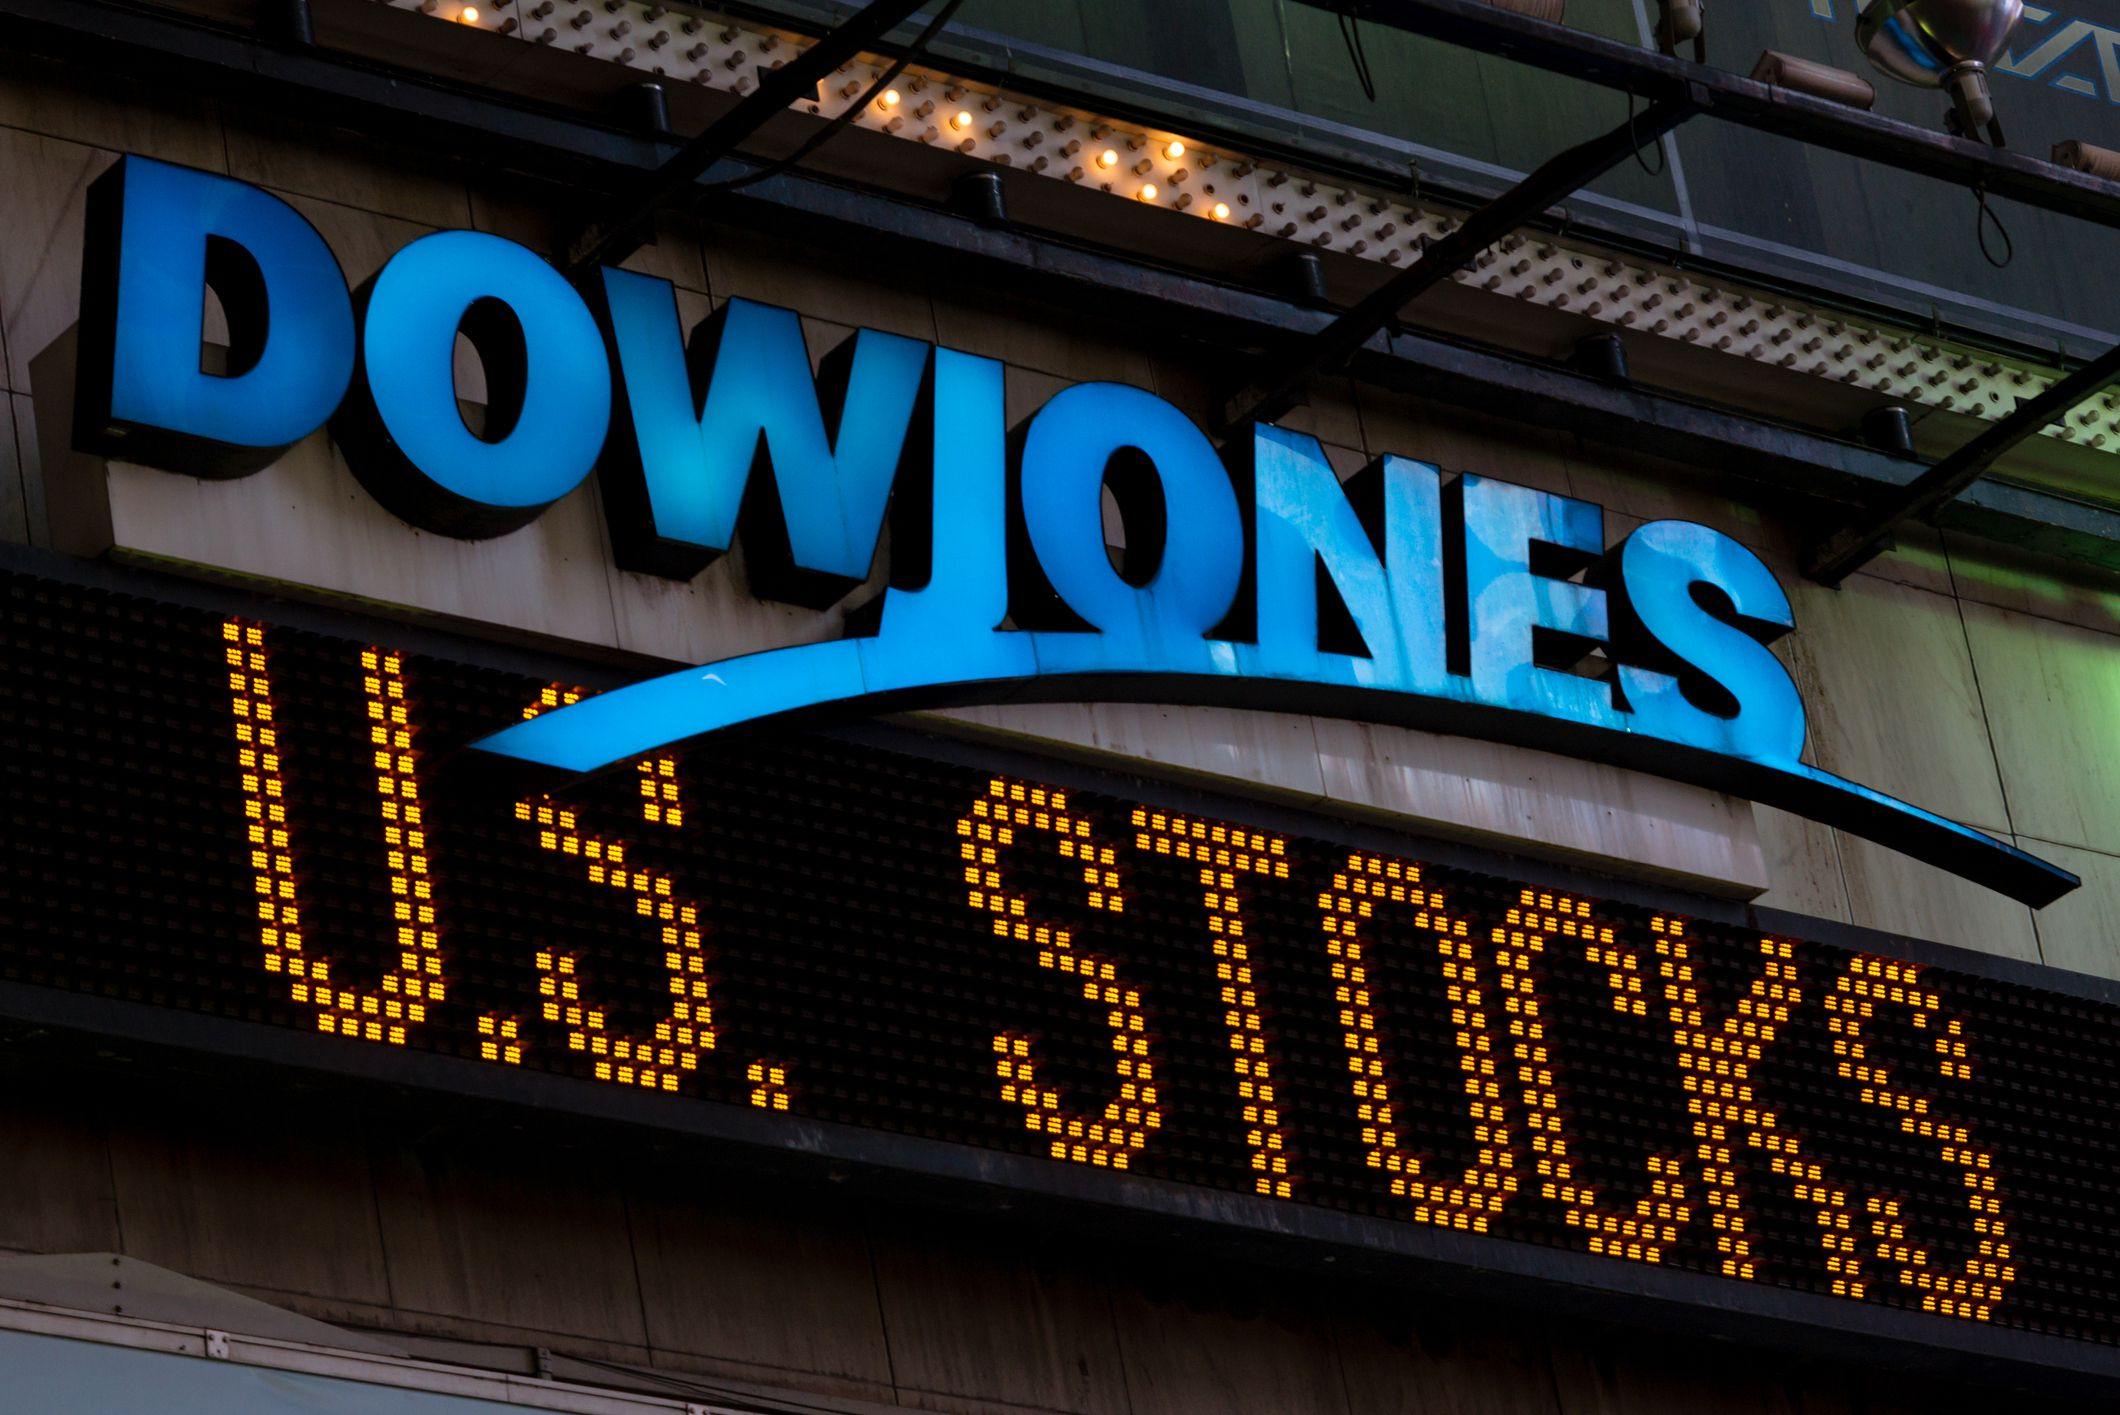

* PG | The Procter & Gamble Company
* CSCO | Cisco Systems, Inc.
* AXP | American Express Company
* UNH | UnitedHealth Group Incorporated
* MMM | 3M Company
* CRM | salesforce.com, inc.
* IBM | International Business Machines Corporation
* DIS | The Walt Disney Company 
* WMT | Walmart Inc.
* KO | The Coca-Cola Company	<
* JNJ | Johnson & Johnson
* HON | Honeywell International Inc.
* MCD | McDonald's Corporation
* VZ | Verizon Communications Inc.
* CAT | Caterpillar Inc.
* GS | The Goldman Sachs Group, Inc.
* INTC | Intel Corporation	
* MRK | Merck & Co., Inc. 
* V | Visa Inc. 
* NKE | NIKE, Inc. 
* HD | The Home Depot, Inc.
* AAPL | Apple Inc. 
* TRV | The Travelers Companies, Inc.	
* WBA | Walgreens Boots Alliance, Inc.
* JPM | JPMorgan Chase & Co.	
* DOW | Dow Inc.  ### No fue posible ocupar esta accion ya que no tiene el numero de observaciones requeridas
* AMGN | Amgen Inc 
* MSFT | Microsoft Corporation
* CVX | Chevron Corporation	
* BA | The Boeing Company 

**Cargamos las bases de datos**

In [ ]:
precios_PG = "https://query1.finance.yahoo.com/v7/finance/download/PG?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_CSCO = "https://query1.finance.yahoo.com/v7/finance/download/CSCO?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_AXP = "https://query1.finance.yahoo.com/v7/finance/download/AXP?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_UNH = "https://query1.finance.yahoo.com/v7/finance/download/UNH?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_MMM = "https://query1.finance.yahoo.com/v7/finance/download/MMM?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_CRM = "https://query1.finance.yahoo.com/v7/finance/download/CRM?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_IBM = "https://query1.finance.yahoo.com/v7/finance/download/IBM?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_DIS = "https://query1.finance.yahoo.com/v7/finance/download/DIS?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_WMT = "https://query1.finance.yahoo.com/v7/finance/download/WMT?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_KO = "https://query1.finance.yahoo.com/v7/finance/download/KO?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_JNJ = "https://query1.finance.yahoo.com/v7/finance/download/JNJ?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_HON = "https://query1.finance.yahoo.com/v7/finance/download/HON?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_MCD = "https://query1.finance.yahoo.com/v7/finance/download/MCD?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_VZ = "https://query1.finance.yahoo.com/v7/finance/download/VZ?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_CAT = "https://query1.finance.yahoo.com/v7/finance/download/CAT?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_GS = "https://query1.finance.yahoo.com/v7/finance/download/GS?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_INTC = "https://query1.finance.yahoo.com/v7/finance/download/INTC?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_MRK = "https://query1.finance.yahoo.com/v7/finance/download/MRK?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_V = "https://query1.finance.yahoo.com/v7/finance/download/V?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_NKE = "https://query1.finance.yahoo.com/v7/finance/download/NKE?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_HD = "https://query1.finance.yahoo.com/v7/finance/download/HD?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_AAPL = "https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_TRV = "https://query1.finance.yahoo.com/v7/finance/download/TRV?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_WBA = "https://query1.finance.yahoo.com/v7/finance/download/WBA?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_JPM = "https://query1.finance.yahoo.com/v7/finance/download/JPM?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_AMGN = "https://query1.finance.yahoo.com/v7/finance/download/AMGN?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_MSFT = "https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_CVX = "https://query1.finance.yahoo.com/v7/finance/download/CVX?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"
precios_BA = "https://query1.finance.yahoo.com/v7/finance/download/BA?period1=1483228800&period2=1615161600&interval=1d&events=history&includeAdjustedClose=true"


# **Limpieza**

**Lo que queremos hacer, es un dataframe que contenga los precios de cierre del día de las acciones, pero necesitamos hacer algunos pasos de limpieza para lograrlo.**


Vamos a juntar en una lista las claves de pizarra, para no tener que cargarlos uno por uno manualmente:

In [ ]:
claves_pizarra = [precios_PG, precios_CSCO, precios_AXP, precios_UNH, precios_MMM, precios_CRM, precios_IBM, precios_DIS, precios_WMT, precios_KO, precios_JNJ, precios_HON, precios_MCD, precios_VZ, precios_CAT, precios_GS, 
                      precios_INTC, precios_MRK, precios_V, precios_NKE, precios_HD, precios_AAPL, precios_TRV, precios_WBA, precios_JPM, precios_AMGN, precios_MSFT, precios_CVX, precios_BA]

La funcion pd.read_csv no lee listas, así que haremos un loop para extraer los datos de las acciones, el resultado serán dataframes para cada acción, pero contendrán los valores de precio máximos, mínimos, de apertura y de cierre por día: 

In [ ]:
precios_downjones  = [] 

for filename in claves_pizarra: 
    data = pd.read_csv(filename, index_col="Date")
    precios_downjones.append(data)

Ahora uniremos los dataframes de manera horizontal, porque queremos visualizar los datos de las empresas por día:

In [ ]:
frame = pd.concat(precios_downjones, axis=1) 

Seleccionamos solo las columnas de precio de cierre 

In [ ]:
precios_cierre = frame["Close"] 

In [ ]:
precios_cierre 

**Como pudiste observar, las columnas del dataframe dicen "Close", aún no sabemos a qué acción se refiere. Vamos a cambiar el nombre de las columnas, para eso haremos:**

1) Una serie con los nombres de las acciones:

In [ ]:
titulos = ["PG","CSCO","AXP","UNH","MMM","CRM","IBM","DIS","WMT","KO","JNJ","HON","MCD","VZ","CAT","GS","INTC","MRK","V","NKE","HD","AAPL","TRV","WBA","JPM","AMGN","MSFT","CVX","BA"] 

2) Usar esa serie como títulos de las columnas:

In [ ]:
precios_cierre.columns = titulos 


¡Y listo!

In [ ]:
precios_cierre

**Ahora, crearemos una función que expresa (mediante un porcentaje) la relación entre el precio del cierre del día y el precio del cierre del día anterior. En otras palabras, el rendimiento de la acción:**

 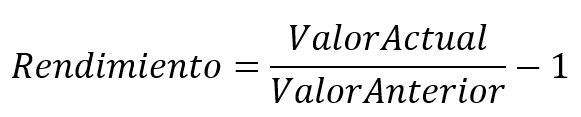

In [ ]:
def porcentaje(accion):

      return  (accion/accion.shift(1))-1


**Con la función apply, aplicaremos la función a todo nuestro dataframe de precios de cierre.**

In [ ]:
rendimientos_de_precio_cierre = precios_cierre.apply(porcentaje)

**Como podemos notar, en la primera fila tenemos NANs, porque la función necesita dividir entre los valores anteriores a este y no existen:**

In [ ]:
rendimientos_de_precio_cierre

1) Vamos a verificar que solo nos genero un NAN por acción, sumándolos por columnas: 

In [ ]:
rendimientos_de_precio_cierre.isna().sum(axis=0) 
#En este caso pusimos axis 0 ya que sabiamos que los NAN estaba en la primera fila y con esto nos aseguramos 
#ya que si exisitira alguno saldria 2, y de ser asi significa que existe en otra fila (apesar de que estamos calculando columnas)

2) Ahora que estamos seguros, vamos a quitarlos:

In [ ]:
limpios_rendimientos_cierre = rendimientos_de_precio_cierre.dropna(axis=0, how="any")

3) Una última checadita antes de continuar no hace daño:

In [ ]:
limpios_rendimientos_cierre.isna().sum(axis=0)


In [ ]:
limpios_rendimientos_cierre

#Ahora que tenemos nuestros datos limpios, están listos para usarse y responder algunas preguntas, ¡hagámoslo!

**¿Cómo podemos predecir cuál será el rendimiento anual de una acción?**

Sacamos el retorno esperado



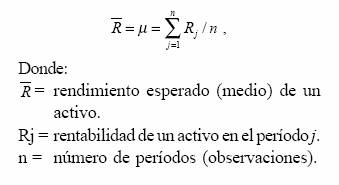

In [ ]:
retorno = limpios_rendimientos_cierre.mean() * 252

# Obtenemos el promedio de los rendimientos de las acciones y
# lo multiplicamos por 252 porque no estamos contando días festivos ni fines de semana.

Creamos el dataframe retorno partiendo de la serie retorno_esperado convirtiéndola a dataframe usando .to_frame()

In [ ]:
data_frame_retorno = retorno.to_frame()



Le cambiamos el nombre a la primer columna a retorno

In [ ]:
data_frame_retorno.columns = ['retorno'] 


Mostramos la tabla

In [ ]:
data_frame_retorno

**¿Cuales son las top 5 empresas de rendimiento esperado?**

In [ ]:
data_frame_retorno.sort_values("retorno", ascending=False).head(5)

**¿En que año, en promedio, se generaron los mayores rendimientos el DowJones?**


Para contestar esa pregunta es necesario agrupar los datos por año

In [ ]:
# Extraer el index (fechas) 
dates = pd.to_datetime(limpios_rendimientos_cierre.index)
# Acceder sólo a los años
dates.year

In [ ]:
# Agrupar por los años
valores = limpios_rendimientos_cierre.groupby(dates.year).sum()
valores

In [ ]:
#Respondemos la pregunta 
rendimientos_por_anio = valores.mean(axis=1)*100

rendimientos_por_anio[rendimientos_por_anio == rendimientos_por_anio.max()]

# El rendimientos esta en % por lo que seria el total 

**¿En que año, en promedio, se generaron los peores rendimientos el DowJones?**

In [ ]:
rendimientos_por_anio[rendimientos_por_anio == rendimientos_por_anio.min()]

# ¿Te sorprendes que no haya sido el 2020? En el 2018 fue un año muy malo para las empresas 
# ya que Estados Unidos se estaba teniando una "guerra comercial" con China

**¿Qué tal la pasaron las empresas con el COVIcho?**


In [ ]:
valores_2020 = valores[valores.index == 2020]
valores_2020

Podemos hacer una gráfica para observarlo mejor:

In [ ]:
valores_2020.plot.bar(figsize = (40,20))


**¿Qué acción genera mayor rendimiento promedio?** 

In [ ]:
promedio_rendimiento_empresas = limpios_rendimientos_cierre.mean()
promedio_rendimiento_empresas[promedio_rendimiento_empresas == promedio_rendimiento_empresas.max()]

#Ya vimos que la acción AAPL generó el mejor rendimiento, entonces, ¿nos conviene comprarla?

**No tan rápido vaquero, recuerda que las acciones son como la canción de elefante: te sube, te baja, te quita y a veces te lo da. Una acción que genera mucho rendimiento también puede tener mucho riesgo... o poco. Obviamente nos gustaría tener acciones que generen un rendimiento justo para el riesgo que estamos asumiento, y ese es el papel de algunos parámetros financieros como la relación de Sharpe.**

**¿Cuál es la mejor acción, considerando el riesgo rendimiento?** 

Utilizaremos la razón de sharpe (en la fórmula dice portafolios, pero lo usaremos para las acciones individuales). La acción que maximice esa relación es la que mayor rendimiento genera de acuerdo al riesgo asumido. 


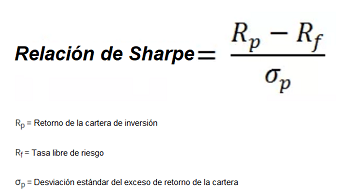


Para poder contestar ésto claramente, tenemos que agregar algunas columnas extras a la tabla de rendimientos, para poder agregar algunos columnas extras. Necesitamos un valor de tasa libre de riesgo (0.0164) y representa una acción que presenta una fluctuación mínima en su cotización histórica. 

In [ ]:
# Creamos la columna tasa_libre_de _riesgo con un valor estático de 1.64 a todas las columnas
data_frame_retorno['tasa_libre_de_riesgo'] = .0164

In [ ]:
#Sacamos al desviación estándar del dataframe limpios_rendimientos_cierre con la función std()
desviacion = limpios_rendimientos_cierre.std() 

In [ ]:
import math #Importamos math para poder hacer la raíz cuadrada de 252 para añadirla posteriormente a una variable. 
raiz = math.sqrt(252)

In [ ]:
#Hacemos la operación de desviacion x raiz para poder anualizar la desviacion estandar, posteriormente añadirla a nuestro dataframe. 
desviacion =  (raiz * desviacion) 

In [ ]:
#Agregamos la columna desviacion_estandar y añadimos los valores obtenidos en la línea anterior
data_frame_retorno['desviacion_estandar'] = desviacion

In [ ]:
#Ya podemos obtener nuestro radio de Sharpe y utilizaremos lambda, hacemos referencia a las columnas del dataframe y por último la agregamos como nueva columna
data_frame_retorno['sharpe_ratio'] = data_frame_retorno.apply(lambda row: (row.retorno - row.tasa_libre_de_riesgo)/row.desviacion_estandar, axis=1)


In [ ]:
data_frame_retorno

Ahora sí, podemos saber qué acción tiene el mayor radio de Sharpe 

In [ ]:
df_sharpe_ratio= data_frame_retorno["sharpe_ratio"]
df_sharpe_ratio[df_sharpe_ratio == df_sharpe_ratio.max()]

En este caso nos volvio a dar APPL por lo que podemos intuir que vamos a ver mas de este empresa en un buen % del portafolio

**¿Está muy bien hasta aquí, no? Pero no queremos comprar solo una acción, queremos comprar varias para que cuando una comience a caer, los retornos de las otras acciones no nos afecten tanto. Para eso son los portafolios de inversión, que dividen la inversión en el número de acciones con el fin de obtener las mejores combinaciones.**

## Pero, ¿te imaginas obtener el riesgo y el rendimiento de **tooodas** las combinciones de acciones posibles?

Claro que no, eso no va a pasar 

# **Lo que haremos es utilizar la API de Yahoo Finance y las librerías yfinance  y PyPortfolioOpt que harán las cosas más fáciles**

**Cargamos los datos utilizando el API Yahoo Finance** https://pypi.org/project/yfinance/

Instalamos

In [ ]:
!pip install yfinance

Instalamos la libreria PyPortfolioOpt para el Portafolio que nos ayudara con  optimizacion https://pyportfolioopt.readthedocs.io/en/latest/

In [ ]:
!pip install PyPortfolioOpt

Importamos las librerias

In [ ]:
import yfinance as yf 
import pypfopt
from pypfopt import plotting



Los primeros pasos son los mismos, listar los nombres de las acciones:






In [ ]:
dowjones30 = ["PG","CSCO","AXP","UNH","MMM","CRM","IBM","DIS","WMT","KO","JNJ","HON","MCD","VZ","CAT","GS","INTC","MRK",
                "V","NKE","HD","AAPL","TRV","WBA","JPM","AMGN","MSFT","CVX","BA"]# Declaramos las claves de pizza para poder descargar los datos
               

Descargamos los datos de la API de las mismas fechas que usamos en la primera sección:

In [ ]:
obtener_datos = pdr.get_data_yahoo(dowjones30, start="2017-01-01", end="2021-03-05") # Por la comparacion de metologias utilizaremos fechas fijas

Obtenemos exclusivamente los precios de cierre

In [ ]:
dowjones_precios_cierre = obtener_datos["Close"] #En esta caso solo requerimos los precios de cierre 
dowjones_precios_cierre

Quitamos NAns y convertimos a dataframe 

In [ ]:
dowjones_cierre = pd.DataFrame((dowjones_precios_cierre.dropna())) #Convertimos a dataframe y tambien nos quitamos los NA, en caso de que tuviera

Informacion del DataFrame

In [ ]:
dowjones_cierre.info() # Verificar que los datos esten bien cargados 
dowjones_cierre.head() # Para poder identificar los datos 

## **Ahora sí, vamos a ponernos un poquito técnicos. Observemos los siguentes gráficos:**

**Gráfico de precios del Dow Jones**

In [ ]:
dowjones_cierre.plot(figsize = (40,20)); # Se imprime una grafica historica de precios en los  ultimos 5 años, ahi tambien podemos notar como las acciones se fueron abajo cuando inicio la cuarentena 
plt.show()

**Aquí podemos observar las líneas históricas de los precios de las acciones. ¿Puedes notar esa zona borrosa donde todas las accione caen? ¿Qué crees que ocurrió?**

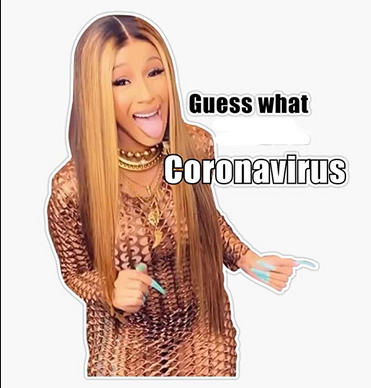

**Grafica de rendimientos diarios**

In [ ]:
rendimiento = pypfopt.expected_returns.returns_from_prices(dowjones_cierre) #Obtenemos los rendimientos diarios 
rendimiento.plot(figsize = (40,20)); #Se imprime una grafica para poder ver que tan volatil son los rendimientos 
plt.show()

**Este gráfico nos muestra las fluctuaciones de los rendimientos diarios de las acciones. Podemos inferir que entre más largos son los picos, más volatil es la acción. ¿Y dónde hubo mayor volatilidad? Claro que sí, en la pandemia.**

**Utilizamos pipfopt para obtener el Retorno Esperado**

In [ ]:
retorno_esperado = pypfopt.expected_returns.mean_historical_return(dowjones_cierre,compounding=False) # Con esta se hace un promedio de los precios anuales "Es lo que se espera recibir cada año"
retorno_esperado.plot.bar(figsize = (40,20)) # Mostramos una grafico de barras para hacer una comparacion con los rendimientos esperados 


**Este gráfico nos muestra el promedio de rendimientos anuales por acción, en otras palabras, nos permite predecir lo que esperaríamos recibir cada año de ellas.**

**En esta parte haremos un paréntesis antes de continuar con los portafolios, demostraremos que nuestra limpieza manual fue buena y nos arroja los mismos resultados que la limpieza del portafolio**

 dowjones_cierre es el dataframe que obtuvo "automaticamente" por la API. Por otra parte, el dataframe precios_cierre es el que hicimos "manualmente" 

In [ ]:
print(dowjones_cierre)
print(precios_cierre)

Hacemos una comparacion sobre lo que se hizo automaticamente (rendimientos) y lo que se hizo manualmente (limpios_rendimientos_cierre)

In [ ]:
print(limpios_rendimientos_cierre)
print(rendimiento)

Hacemos una comparacion sobre lo que se hizo automaticamente(retorno) y lo que se hizo manual sobre retorno esperado(retorno_esperado)

In [ ]:
print(retorno_esperado)
print(retorno)

**Ahora sí, es hora de ponernos serios y no andar arriesgándonos con una sola acción. Un portafolio nos da la oportunidad de combinar los porcentajes de inversión entre varias acciones para que tú decidas cuánto te vas a arriesgar.**

## **Cálculo de Portafolio**

**Utilizamos pipfopt para obtener la Covarianza** *Calcula la matriz de covarianza muestral anualizada de los rendimientos (diarios)*

In [ ]:
riesgo = pypfopt.risk_models.sample_cov(dowjones_cierre) # Con esta función cargamos la matriz de covarianza 
pypfopt.plotting.plot_covariance(riesgo) # Mostramos la gráfica de covarianza 

**Frontera Efficiente**

In [ ]:
frontera_eficiente = pypfopt.efficient_frontier.EfficientFrontier(retorno_esperado,riesgo, weight_bounds=(0,1)) # Con esta función generamos la frontera eficiente 


**Frontera eficiente**

In [ ]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(frontera_eficiente, ax=ax, show_assets=False) 

**Ratio de Sharpe**

In [ ]:
sharpe_ratio = frontera_eficiente.max_sharpe(risk_free_rate=(0.01644)) # Cargamos el ratio de Sharpe especificando la tasa libre de riesgo 
sharpe_ponderacion = frontera_eficiente.clean_weights() # Con esto hacemos que los puntos decimales sean más chicos 
print(sharpe_ponderacion) # Nos muestra las ponderaciones de donde se ubica el ratio Sharpe 


**Gráfica completa**

In [ ]:
frontera_eficiente = pypfopt.efficient_frontier.EfficientFrontier(retorno_esperado,riesgo, weight_bounds=(0,1)) # Se volvio a declarar frontera_eficiente ya que cuando se realizan algunos calculos arriba la frontera cambia
fig, ax = plt.subplots(figsize = (10,5)) # No se hizo mas grande por que arroja error por exceso de uso de ram 
plotting.plot_efficient_frontier(frontera_eficiente, ax=ax, show_assets=True) # Cargamos la grafica donde se van a poner todos los puntos 

maximo = frontera_eficiente.max_sharpe() # Aqui volvemos a declar para poder correr lo  en la grafica 
ret_tangent, std_tangent, _ = frontera_eficiente.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="o", s=100, c="y", label="Max Sharpe") # Se declara como queremos que se muestre en la grafica 

frontera_eficiente_minimo = pypfopt.efficient_frontier.EfficientFrontier(retorno_esperado,riesgo, weight_bounds=(0,1)) #Volvemos a declar la linea ya que con el uso de max.sharpe cambia el valor 
minimo = frontera_eficiente_minimo.min_volatility() # Manda el mismo error si no detectara la frontera eficiente 
ret_tangent, std_tangent, _ = frontera_eficiente_minimo.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="o", s=100, c="r", label="Min Riesgo") # Se declara como queremos que se muestre en la grafica 

n_samples = 10000  # El numero de puebras que se mantuvo bajo ya que cuando ponemos mas colab no aguanto
w = np.random.dirichlet(np.ones(len(retorno_esperado)), n_samples) # A diferencia de la version en R esta paqueteria no tiene incluido Monte Carlo por lo que la documentacion nos recomienda este modelo 
rets = w.dot(retorno_esperado) # Obtenemos rendimientos 
stds = np.sqrt(np.diag(w @ w.T)) # Obtenemos la desviacion estandar 
sharpes = rets / stds 
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

ax.set_title("Frontera Eficiente") # Titulo de la Tabla 
ax.legend() # Ponemos las leyendas en las graficas 
plt.tight_layout() 
plt.savefig("frontera_eficiente_scatter.png", dpi=800,) # Guardamos la imagen 
plt.show() # Mostramos la imagen 

# **Conclusiones y Explicaciones**

**¿Por que es necesario hacer un portafolio?** 

Pues... para arriesgarte sólo lo necesario. En otras palabras, para no poner todos los huevos en una misma canasta. (De lo contrario, si la canasta se cae se rompen todos los huevos).



En las siguientes líneas veremos ejemplos de portafolios: 
1) El primero maximiza el radio de Sharpe y es probablemente el que un profesional te diría que compres. 
2) Este portafolio, como su nombre lo indica, es el que menos fluctuaciones presentaría, el más "seguro". 
3) Portafolio con pesos iguales: decidiste repartir tu inversión en partes iguales para las empresas, ese es el resultado. 
4) Portafolio con un rendimiento específico de 16%, dejamos fijo ese valor para obtener su riesgo. 

**Portafolio de Sharpe**

In [ ]:
frontera = pypfopt.efficient_frontier.EfficientFrontier(retorno_esperado,riesgo, weight_bounds=(0,1)) # Se volvió a declarar frontera_eficiente ya que cuando se realizan algunos cálculos arriba la frontera cambia
weights = frontera.max_sharpe()
cleaned_weights = frontera.clean_weights()
frontera.portfolio_performance(verbose=True)

**Portafolio de Minima Varianza**

In [ ]:
frontera = pypfopt.efficient_frontier.EfficientFrontier(retorno_esperado,riesgo, weight_bounds=(0,1)) #Se volvi+o a declarar frontera_eficiente ya que cuando se realizan algunos cálculos arriba la frontera cambia
weights = frontera.min_volatility()
cleaned_weights = frontera.clean_weights()
frontera.portfolio_performance(verbose=True)

**Portafolio de Pesos Iguales**

Como son 29 acciones se obtendra el (1/29) de cada rendimiento de accion y desviacion estandar (riesgo)

In [ ]:
data_frame_retorno["rendimiento%"] = data_frame_retorno.apply(lambda row: (row.retorno*1/29), axis=1)
data_frame_retorno["desv%"] = data_frame_retorno.apply(lambda row: (row.desviacion_estandar*1/29), axis=1)
data_frame_retorno["sharpe%"] = data_frame_retorno.apply(lambda row: (row.sharpe_ratio*1/29), axis=1)


In [ ]:
print("Expected annual return:",round(data_frame_retorno["rendimiento%"].sum()*100,2),"%")
print("Annual volatility:",round(data_frame_retorno["desv%"].sum()*100,2),"%")
print("Sharpe Ratio:",round(data_frame_retorno["sharpe%"].sum(),2))

**Portafolio de Rendimiento Especifico**

El siguiente portafolio se forma dandole un rendimiento especifico (16%), ya que buscaremos hacer una comparacion entre un rendimiento sin buscar la eficiencia (en este caso fue el de Portafolio Pesos Iguales)  y otro que si 

In [ ]:
frontera = pypfopt.efficient_frontier.EfficientFrontier(retorno_esperado,riesgo, weight_bounds=(0,1)) # Se volvió a declarar frontera_eficiente ya que cuando se realizan algunos cálculos arriba la frontera cambia
weights = frontera.efficient_return(.16) #Aqui ponemos que es 16% que es el mismo rendimiento que nos Portafolio de Pesos Iguales
cleaned_weights = frontera.clean_weights()
frontera.portfolio_performance(verbose=True)


¿Que podemos concluir con estos 4 portafolios?
1. El portafolio de Sharpe te da un poquito mas del doble del rendimiento pero con menor riesgo comparando con Portafolio de pesos iguales 
2. El portafolio de rendimiento especifico (16%) que es el mismo rendimiento que obtenemos con portafolio de pesos iguales, tiene un menor riesgo y un mejor ratio de sharpe 
3. El portafolio de minima varianza (minimo riesgo) tiene un rendimiento inferior por 6.5% a comparacion de Portafolio de pesos iguales sin embargo este tiene casi el doble de riesgo 
4. La practica en general se busca que el ratio de Sharpe sea mayor a uno (aun que claro eso tambien depende del perfil de la persona) por lo que el unico que cumple con esto (de estos 4 selecionados) es el de Maxima de Sharpe (claro por claras razones) ya que esa combinacion de acciones (El DowJones) el maximo ratio de sharpe que pueden alcanzar es ese  

Pero las cosas se ven mejor graficadas

In [ ]:
frontera_eficiente = pypfopt.efficient_frontier.EfficientFrontier(retorno_esperado,riesgo, weight_bounds=(0,1)) #Se volvio a declarar frontera_eficiente ya que cuando se realizan algunos calculos arriba la frontera cambia
fig, ax = plt.subplots(figsize = (10,5)) # No se hizo mas grande por que arroja error por exceso de uso de ram 
plotting.plot_efficient_frontier(frontera_eficiente, ax=ax, show_assets=True) #Cargamos la grafica donde se van a poner todos los puntos 

maximo = frontera_eficiente.max_sharpe() # Aqui volvemos a declar para poder correr lo  en la grafica 
ret_tangent, std_tangent, _ = frontera_eficiente.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="o", s=100, c="g", label="Max Sharpe") # Se declara como queremos que se muestre en la grafica 

frontera_eficiente_minimo = pypfopt.efficient_frontier.EfficientFrontier(retorno_esperado,riesgo, weight_bounds=(0,1)) # Volvemos a declar la linea ya que con el uso de max.sharpe cambia el valor 
minimo = frontera_eficiente_minimo.min_volatility()
ret_tangent, std_tangent, _ = frontera_eficiente_minimo.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="o", s=100, c="y", label="Min Riesgo") # Se declara como queremos que se muestre en la grafica 

frontera_eficiente_determinado = pypfopt.efficient_frontier.EfficientFrontier(retorno_esperado,riesgo, weight_bounds=(0,1)) # Volvemos a declar la linea ya que con el uso de min.sharpe cambia el valor 
determinado = frontera_eficiente_determinado.efficient_return(.16)
ret_tangent, std_tangent, _ = frontera_eficiente_determinado.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="o", s=100, c="b", label=" Rendimiento Determinado") # Se declara como queremos que se muestre en la grafica 

n_samples = 10000  # El numero de puebras que se mantuvo bajo ya que cuando ponemos mas colab no aguanto
w = np.random.dirichlet(np.ones(len(retorno_esperado)), n_samples) # A diferencia de la version en R esta paqueteria no tiene incluido Monte Carlo por lo que la documentacion nos recomienda este modelo 
rets = w.dot(retorno_esperado) # Obtenemos rendimientos 
stds = np.sqrt(np.diag(w @ w.T)) # Obtenemos la desviacion estandar 
sharpes = rets / stds 
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

ax.scatter(.2898, .16 , marker="o", s=100, c="r", label="Portafolio Pesos Iguales") #Parametros de Portafolio iguales .2898 es = volatilidad anual y .16 = rendimiento 

ax.set_title("Frontera Eficiente") # Titulo de la Tabla 
ax.legend() # Ponemos las leyendas en las graficas 
plt.tight_layout() 
plt.savefig("frontera_eficiente_scatter1.png", dpi=800,) # Guardamos la imagen 
plt.show() # Mostramos la imagen 

Aqui podemos ver el portafolio de Pesos Iguales, solo para recordar los datos del eje x = Volatilidad que es igual a Riesgo y el eje de las y = Rendimiento 


Entonces recordemos que el rendimiento determinado lo pusimos por el rendimiento que nos dio el Portafolio de Pesos Iguales, en esta grafica se puede ver claramente lo importante que es optar por un portafolio de la frontera eficiente, el riesgo de Portafolio de Pesos Iguales es sumamente grande por el rendimiento que te da.

# **Conclusion en General**

Bueno ¿Que aprendimos? que el 2018 fue el año con peor en rendimiento que el mismo coronavirus; aunque si tuvo la caida mas grande, sin embargo no tardo en levantarse, ¿Entonces podemos concluir que estar peleando con China es mas perjucial para USA que mantener a toda su poblacion encerrada? Hay que recordar que China es la fabrica del Planeta, tambien vimos cual es la accion mas rentable y tambien curiosamente es la accion que mas Ratio de Sharpe da por lo que APPLE podemos considerar como una empresas bastante fuerte, claro tiene tanto dinero que en USA ya tienen su propia tarjetas de credito

Respecto a los portafolios creo que ya se demostro que cuando se trata de poder selecionar las mejores acciones es bueno darle un vistaso a la Frontera Eficiente de Markowitz, sin embargo no es la forma mas moderna de hacerlo ya que existe otro modelos uno igual de popular llamado CAPM que es un modelo que se creo para cubrir las "debilidades del modelo de Markowitz", tambien no solo es seleccionar acciones, hay un famoso invercionista que dice "La verdadera ganancia se encuentra en la compra no en las venta", ¿que quiere decir esto? en pocas palabras es mas eficiente enfocarse en la compra ya que si compraste inteligentemente la ganancia "esta asegurada"


Por lo que ese va a ser el siguiente paso para este proyecto (si llegamos al siguiente módulo), usaremos IA (o por lo menos eso esperamos) para determinar cuando es el mejor momento para comprar acciones y exploraremos el modelo CAPM.

# **Despedida**

Bueno, por nuestra parte sería todo, muchas gracias por todo y esperemos vernos en el siguiente módulo. 

In [ ]:
print("¡Adios Mundo!") 